In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import math
import seaborn as sns

In [3]:
from IPython.core.display import display, HTML
#display(HTML(my_html))     # make sure Jupyter knows to display it as HTML

In [87]:
#url = 'https://www.boxofficemojo.com/title/tt0118715/' 
#url = 'https://www.imdb.com/name/nm0001202?ref_=nv_sr_srsg_0'
fassbinder_page = 'https://www.imdb.com/name/nm0001202/'
#fassbinder_page = 'https://www.imdb.com/name/nm0001202/?ref_=nv_sr_srsg_0#director'
godard_page = 'https://www.imdb.com/name/nm0000419/?ref_=nv_sr_srsg_0'
hitchcock_page = 'https://www.imdb.com/name/nm0000033'
speilberg_page = 'https://www.imdb.com/name/nm0000229'
kurosawa_page = 'https://www.imdb.com/name/nm0000041/'
bergman_page = 'https://www.imdb.com/name/nm0000005/'
allen_page = 'https://www.imdb.com/name/nm0000095'
director_page = allen_page
url = director_page
response = requests.get(url)

In [88]:
response.status_code  #200 = success!

200

In [31]:
response.text[:100]  #First 1000 characters of the HTML

'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008'

In [89]:
page = response.text

In [33]:
#display(HTML(page)) 

In [90]:
soup = BeautifulSoup(page, "lxml")

In [35]:
#print(soup)

In [36]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///name/nm0000033?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Alfred Hitchcock - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});

In [37]:
#soup.find_all('div', class_='filmo-category-section')

In [38]:
# soup.find_all('div', class_='filmo-row odd')

In [39]:
# len(soup.find_all('div', class_='filmo-row odd') )

In [40]:
# soup.find_all('div', class_='filmo-row odd', id=re.compile("director"))

In [41]:
len(soup.find_all('div', class_=re.compile('filmo-row'), id=re.compile("director")))

85

In [91]:
films = soup.find_all('div', class_=re.compile('filmo-row'), id=re.compile("director"))
films

[<div class="filmo-row odd" id="director-tt8593904">
 <span class="year_column">
  2020
 </span>
 <b><a href="/title/tt8593904/">Rifkin's Festival</a></b>
 <br/>
 </div>,
 <div class="filmo-row even" id="director-tt7139936">
 <span class="year_column">
  2019
 </span>
 <b><a href="/title/tt7139936/">A Rainy Day in New York</a></b>
 <br/>
 </div>,
 <div class="filmo-row odd" id="director-tt5825380">
 <span class="year_column">
  2017
 </span>
 <b><a href="/title/tt5825380/">Wonder Wheel</a></b>
 (directed by)
 <br/>
 </div>,
 <div class="filmo-row even" id="director-tt4354616">
 <span class="year_column">
  2016
 </span>
 <b><a href="/title/tt4354616/">Crisis in Six Scenes</a></b>
 (TV Mini-Series) (6 episodes)
 <br/>
 <div class="filmo-episodes">
 - <a href="/title/tt4699530/">Episode #1.5</a>
 (2016)
 </div>
 <div class="filmo-episodes">
 - <a href="/title/tt4699528/">Episode #1.4</a>
 (2016)
 </div>
 <div class="filmo-episodes">
 - <a href="/title/tt4699524/">Episode #1.3</a>
 (2016)

In [43]:
# def get_embedded_first_div_of_class( the_div, class_name ):
# #     if( the_div.find(class_ = class_name)) == None:
#       for div in the_div.find_all('div'):
#             if div.

* Clean the datapoints below
* Ensure they are available or handled for each film's page
* Convert into numeric datatypes
* Populate a list of dictionaries with these 
* Within the loop that goes through every flick, populate the list of dictionaries with these
* Do one-hot-encoding on categorical variables
* Train and test the linear regression model

In [44]:
def is_TV_Series( the_film_soup ):  
    try:
        check_text = the_film_soup.find('a', title='See more release dates' )
        if check_text is not None:
            if( check_text==re.compile('TV Series')): 
                print("It's a TV series")
                return True
        else:
            return False
    except:
        return False
    

In [45]:
## Attempt to drill down on one particular film's web page

# film_url = 'https://www.imdb.com/title/tt2400275/'
# film_url = 'https://www.imdb.com/name/nm0001202'  # Fassbinder
# film_url = fassbinder_page
# film_response = requests.get(film_url)
# film_page = film_response.text
# film_soup = BeautifulSoup(film_page, "lxml")

def get_film_data_only_title( film_soup ):
    film_title_string = film_soup.find(class_ = 'title_wrapper').find('h1').text
    print(film_title_string)
    
# searching from the page_content might be more efficient. To be tested later
def parse_film_data( film_soup ):
    film_data = {}
    
    try:        
        film_title_string = film_soup.find(class_ = 'title_wrapper').find('h1').text
    except:
        film_title_string = ''
    #title_line = film_title_string.strip(')').split(' (')    
    title_line = film_title_string.split('\xa0(')
    film_data['title'] = title_line[0] # title part of title line
    
    film_data['year'] = title_line[1].replace(') ', '') if len(title_line) > 1 else '' # year part of title line

    
    
    if ( is_TV_Series( film_soup) ):
        film_is_TV_series = True
    else:
        film_is_TV_series = False
    film_data['tv_series'] = film_is_TV_series
    
    try:
        film_rating_tag = film_soup.find('span', itemprop='ratingValue')
        try:
            film_rating_string = film_rating_tag.text   #find_next_sibling().text
        except:
            film_rating_string = None #math.nan        
    except:
        film_rating_string = None #math.nan  
    film_data['rating'] = film_rating_string
   
    try:
        film_rating_count_tag = film_soup.find('span', itemprop='ratingCount')
        try:
            film_rating_count = float( film_rating_count_tag.text.replace(',', '')) #find_next_sibling().text
        except:
            film_rating_count = None #math.nan 
    except:
            film_rating_count = None #math.nan  
    film_data['rating_count'] = film_rating_count
    
    try:
        #film_duration_string = film_soup.find('time', datetime="PT85M").text
        film_duration_string = film_soup.find('time').text
        #print(film_duration_string.replace('min',''))
        dur_list = film_duration_string.replace('min','').rstrip().split('h ')
        #print(dur_list)
        film_data['duration'] = (int(dur_list[-1]) + 60*int(dur_list[0])) if (len(dur_list)>1) else int(dur_list[-1])
    except:
        film_data['duration'] = None #math.nan 
      
        
 
    try:
        film_date_string = film_soup.find('a', title='see more release dates')
    except:
        film_date_string = ''  
    
    try:
        film_release_date_tag = film_soup.find('h4', text=re.compile('Release Date:'))
        try:
            #film_budget = film_budget_tag.find_next_sibling().text
            film_release_date = film_release_date_tag.next_sibling.replace('\n', '')
        except:
            film_release_date = '' 
    except:
            film_release_date = '' 
    film_data['release_date'] = film_release_date
    
    
    try:
        film_metacritic_score_tag = film_soup.find('div', class_=re.compile('metacriticScore'))
        try:
            #film_metacritic_score_string = film_metacritic_score_tag.find_child().text
            film_metacritic_score = film_metacritic_score_tag.find('span').text
        except:
            film_metacritic_score = None #math.nan  
    except:
        film_metacritic_score = None #math.nan  
    film_data['metacritic_score'] = film_metacritic_score
    try:
        film_details = film_soup.find('div', class_='article', id='titleDetails')
        try: 
            #film_gross = int(film_details.find('h4', text=re.compile('Cumulative Worldwide Gross:')).next_sibling.strip('$').replace(',',''))
            film_gross_string = film_details.find('h4', text=re.compile('Cumulative Worldwide Gross:')).next_sibling
            #print( film_gross_string )
            film_gross = int( re.sub("[^0-9]", "", film_gross_string ))
        except:
             film_gross = None #math.nan  
    except:
        film_gross = None #math.nan  
    film_data['worldwide_gross']  = film_gross
    
    try:
        film_runtime_tag = film_soup.find('h4', text=re.compile('Runtime:'))
        try:
             film_runtime = int(film_runtime_tag.find_next_sibling().text.strip(' min'))
        except:
            film_runtime = None #math.nan  
    except:
            film_runtime = None #math.nan 
    film_data['runtime'] = film_runtime
    try:
        film_budget_tag = film_soup.find('h4', text=re.compile('Budget'))
        try:
            #film_budget = film_budget_tag.find_next_sibling().text
            #film_budget = int(film_budget_tag.next_sibling.strip('$').replace(',', '') )
            film_budget = int( re.sub("[^0-9]", "", film_budget_tag.next_sibling ))
        except:
            film_budget = None #math.nan  
    except:
            film_budget = None #math.nan  
    film_data['budget'] = film_budget
        
    # collect budget   
#     print( title_line[0] )
#     try:
#         print( title_line[1] )
#     except:
#         print('')
#     print("rating: ", film_rating_string )
#     print("rating count: ", film_rating_count )
#     #print("duration: ", film_data['duration'])
#     print("date: ", film_date_string )
#     print("metacritic: ", film_metacritic_score)
#     print("worldwide gross :", film_gross)
#     print("runtime: ", film_runtime )
#     print("budget: ", film_budget )
    
    return film_data

In [ ]:
#type(film_date_string)

In [ ]:
# cols = ['title', 'year','tv_series', 'rating', 'rating_count', 'duration',   'release_date', 'metacritic_score', 'worldwide gross', 'runtime', 'budget']
# film_catalog = pd.DataFrame(columns = cols )
    

In [93]:
list_of_films = []


for film in films:
    film_url_suffix = film.find('a').get('href')
    film_url = 'https://imdb.com' + film_url_suffix
    print('\n', film_url)
    film_response = requests.get(film_url)
    if(film_response.status_code < 400):
        film_page = film_response.text
        film_soup = BeautifulSoup(film_page, "lxml")
 #   if ( not is_TV_Series( film_soup) ):
        film = parse_film_data( film_soup )
        print(film)
        list_of_films.append(film)
        
film_catalog = pd.DataFrame(list_of_films )



 https://imdb.com/title/tt8593904/
{'title': "Rifkin's Festival", 'year': '2020', 'tv_series': False, 'rating': '6.2', 'rating_count': 694.0, 'duration': 92, 'release_date': ' 2 October 2020 (Spain)    ', 'metacritic_score': '48', 'worldwide_gross': 441261, 'runtime': 92, 'budget': None}

 https://imdb.com/title/tt7139936/
{'title': 'A Rainy Day in New York', 'year': '2019', 'tv_series': False, 'rating': '6.5', 'rating_count': 29880.0, 'duration': 92, 'release_date': ' 10 November 2020 (USA)    ', 'metacritic_score': '38', 'worldwide_gross': 22002504, 'runtime': 92, 'budget': None}

 https://imdb.com/title/tt5825380/
{'title': 'Wonder Wheel', 'year': '2017', 'tv_series': False, 'rating': '6.2', 'rating_count': 25142.0, 'duration': 101, 'release_date': ' 15 December 2017 (USA)    ', 'metacritic_score': '45', 'worldwide_gross': 15889124, 'runtime': 101, 'budget': 25000000}

 https://imdb.com/title/tt4354616/
{'title': 'Crisis in Six Scenes\xa0            ', 'year': '', 'tv_series': Fals

{'title': "Don't Drink the Water", 'year': '1994', 'tv_series': False, 'rating': '6.2', 'rating_count': 3175.0, 'duration': 100, 'release_date': ' 18 December 1994 (USA)    ', 'metacritic_score': None, 'worldwide_gross': None, 'runtime': 100, 'budget': None}

 https://imdb.com/title/tt0109348/
{'title': 'Bullets Over Broadway', 'year': '1994', 'tv_series': False, 'rating': '7.4', 'rating_count': 35413.0, 'duration': 98, 'release_date': ' 24 February 1995 (USA)    ', 'metacritic_score': None, 'worldwide_gross': 13383747, 'runtime': 98, 'budget': 20000000}

 https://imdb.com/title/tt0107507/
{'title': 'Manhattan Murder Mystery', 'year': '1993', 'tv_series': False, 'rating': '7.3', 'rating_count': 39837.0, 'duration': 104, 'release_date': ' 18 August 1993 (USA)    ', 'metacritic_score': None, 'worldwide_gross': 11330911, 'runtime': 104, 'budget': 13500000}

 https://imdb.com/title/tt0104466/
{'title': 'Husbands and Wives', 'year': '1992', 'tv_series': False, 'rating': '7.5', 'rating_count

In [94]:
film_catalog['year'] = pd.to_numeric(film_catalog['year'])
film_catalog['rating'] = pd.to_numeric(film_catalog['rating'])
film_catalog['worldwide_gross'] = pd.to_numeric(film_catalog['worldwide_gross'])
film_catalog['budget'] = pd.to_numeric(film_catalog['budget'])
film_catalog['metacritic_score'] = pd.to_numeric(film_catalog['metacritic_score'])
film_catalog.drop('tv_series',1, inplace=True)

In [85]:
film_catalog.head(50)

,title,year,rating,rating_count,duration,release_date,metacritic_score,worldwide_gross,runtime,budget
0,On Set Home Movies,2008.0,5.6,22.0,17.0,2008 (Sweden),NaN,NaN,17.0,NaN
1,Saraband,2003.0,7.6,7189.0,107.0,1 December 2003 (Sweden),80.0,975181.0,107.0,NaN
2,Bildmakarna,2000.0,6.6,292.0,99.0,15 November 2000 (Sweden),NaN,NaN,99.0,NaN
3,Larmar och gör sig till,1997.0,6.9,859.0,119.0,1 November 1997 (Sweden),NaN,NaN,119.0,NaN
4,Harald & Harald,1996.0,5.7,61.0,10.0,14 January 1996 (Sweden),NaN,NaN,10.0,NaN
5,Sista skriket,1995.0,6.2,147.0,NaN,6 January 1995 (Sweden),NaN,NaN,60.0,NaN
6,Backanterna,1993.0,6.3,41.0,140.0,9 April 1993 (Sweden),NaN,NaN,140.0,NaN
7,Markisinnan de Sade,1992.0,6.8,196.0,105.0,17 April 1992 (Sweden),NaN,NaN,105.0,NaN
8,De två saliga,1986.0,6.1,187.0,81.0,19 February 1986 (Sweden),NaN,NaN,81.0,NaN
9,Dom Juan,1985.0,6.8,28.0,105.0,23 April 1985 (West Germany),NaN,NaN,NaN,NaN


In [ ]:
film_catalog.dtypes

In [ ]:
film_catalog.head()

In [ ]:
#df = pd.DataFramlist_of_films

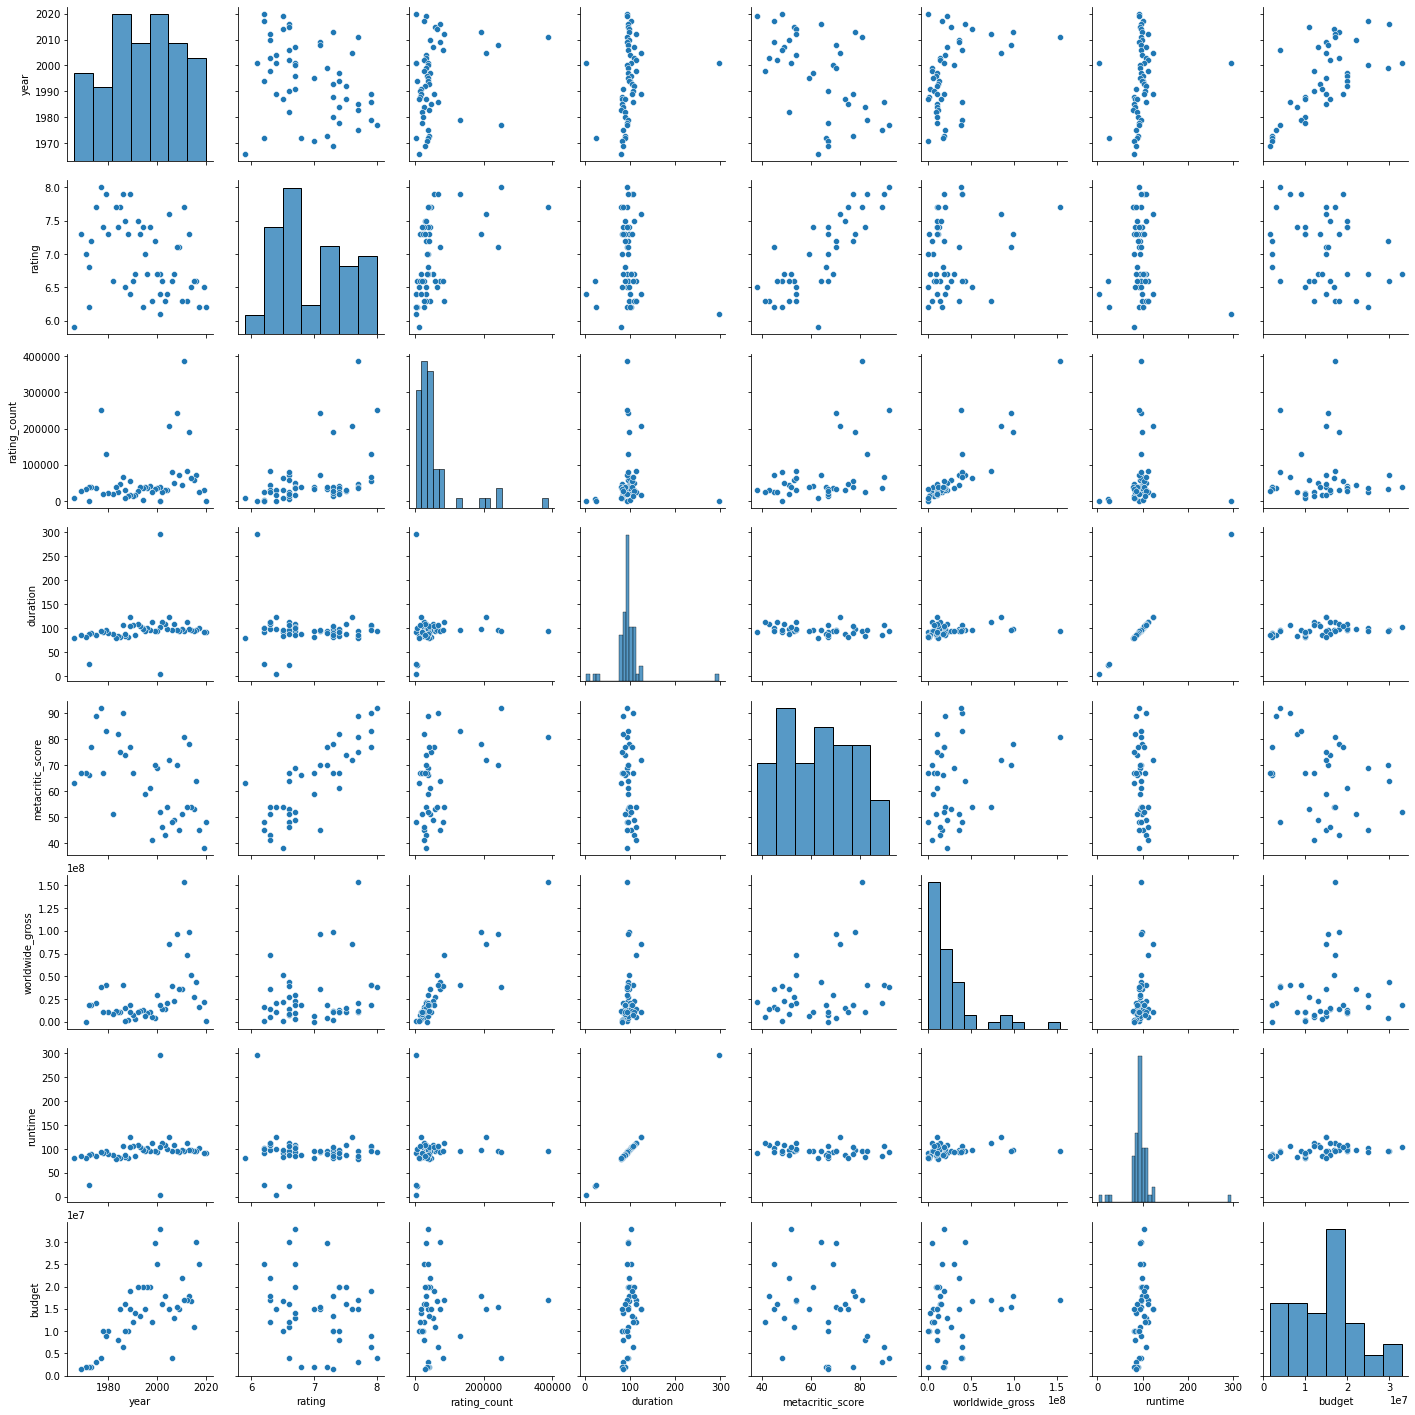

In [95]:
sns.pairplot( film_catalog )

In [ ]:
df = pd.DataFrame()

In [ ]:
flick = {'tv_series': False, 'rating': 6.4, 'rating_count': 480.0, 'duration': None, 'title': 'Une femme coquette', 'year': '1955) ', 'release_date': ' 16 February 1968 (USA)\n    ', 'metacritic_score': None, 'worldwide gross': None, 'runtime': 10, 'budget': None}

In [ ]:
flick2 = {'tv_series': False, 'rating': '7.8', 'rating_count': 72988.0, 'duration': None, 'title': 'Breathless', 'year': '1960) ', 'release_date': ' 7 February 1961 (USA)\n    ', 'metacritic_score': None, 'worldwide gross': None, 'runtime': 90, 'budget': None}

In [ ]:
df.append(flick, ignore_index=True)

In [ ]:
df.append(flick2, ignore_index=True)

In [ ]:
df.head()

In [ ]:
#url = 'https://www.boxofficemojo.com/title/tt0118715/' 
#url = 'https://www.imdb.com/name/nm0001202?ref_=nv_sr_srsg_0'
fassbinder_page = 'https://www.imdb.com/name/nm0001202/?ref_=nv_sr_srsg_0#director'
godard_page = 'https://www.imdb.com/name/nm0000419/?ref_=nv_sr_srsg_0'
'https://www.imdb.com/name/nm0000041/'
director_page = godard_page
url = director_page
response = requests.get(url)

In [ ]:
response.status_code  #200 = success!

In [ ]:
response.text[:1000]  #First 1000 characters of the HTML

In [ ]:
page = response.text

In [ ]:
display(HTML(page)) 

In [ ]:

soup = BeautifulSoup(page, "lxml")


In [ ]:
print(soup)

In [ ]:
s = '1960)'.strip(')') 
s

In [ ]:
soup.find('div', id='director-tt0082671')

In [ ]:
filmography = soup.find('div', id='filmography')
print(filmography.prettify())
print(len(filmography.find_all('div')))

In [ ]:
filmography_hlinks = filmography.find_all('a')
print(len(filmography_hlinks))
type(filmography_hlinks)

In [ ]:
len(filmography_hlinks)
print(filmography_hlinks[0])

In [ ]:
filmography_hlinks_list = []
for element in filmography_hlinks_list:
    filmography_hlinks_list.append(element)

In [ ]:
df = pd.DataFrame(filmography_hlinks_list)
df.head(100)

In [ ]:
my_dict = {'tv_series': False, 'rating': 6.2, 'rating_count': 24.0, 'duration': '\n                        4min\n                    ', 'title': 'Plus Oh!\xa0(1996) ', 'year': '', 'release_date': ' 1996 (France)\n    ', 'metacritic_score': nan, 'worldwide gross': nan, 'runtime': 4, 'budget': nan}

In [ ]:
def traverse(soup):
    found = False
    if soup.name is not None:
        dom_dictionary = {}
        dom_dictionary['name'] = soup.name
        if dom_dictionary['name'] == 'h1':
            print('\n')
            print(soup.text)
            print('\n')
            if not found:
                found_object = soup
                found = True
        dom_dictionary['children'] = [ traverse(child) for child in soup.children if child.name is not None]
        return dom_dictionary, found_object

#traverse(soup)

In [ ]:
#print(film_details_txt_blocks)
# print('\n', film_money)

# page_content = film_soup.find(id = 'pagecontent', recursive = True)
# title_overview = page_content.find(id = 'title-overview', recursive = True)
# # print(title_overview.find('div'))
# page_content_2 = film_soup.find_all(class_ = 'title_wrapper')
# print(page_content_2)

# #print(page_content)
#print(title_overview)
#.find(id = 'title_wrapper', recursive = True)
# film_soup.find(class_ = 'titlewrapper', recursive = True).find_child().text 

# _, info = traverse(page_content)
# info